In [1]:
# Packages
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
import scipy.stats as stats
%matplotlib inline

C:\Users\ishar\AppData\Local\Temp\ipykernel_23816\1767978921.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd, numpy as np


For this demonstration, you'll be using a dataset containing information about NBA players.

First, you'll be seeing how the population mean and the population standard deviation are related to those of the sampling distribution generated. 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
np.random.seed(42) ## so analysis is reproducible

In [6]:
# Population
df = pd.read_excel('nba_ht_wt.xls')
df.head()

Player Pos  Height  Weight  Age      School      BDate
0   Vitor Faverani   C      83     260   25         NaN 1988-05-05
1    Avery Bradley   G      74     180   22       Texas 1990-11-26
2     Keith Bogans   G      77     215   33    Kentucky 1980-05-12
3  Jared Sullinger   F      81     260   21  Ohio State 1992-03-04
4       Jeff Green   F      81     235   27  Georgetown 1986-08-28

In [7]:
df.shape

(505, 7)

In [8]:
df = df[['Weight']]
df.head()

Weight
0     260
1     180
2     215
3     260
4     235

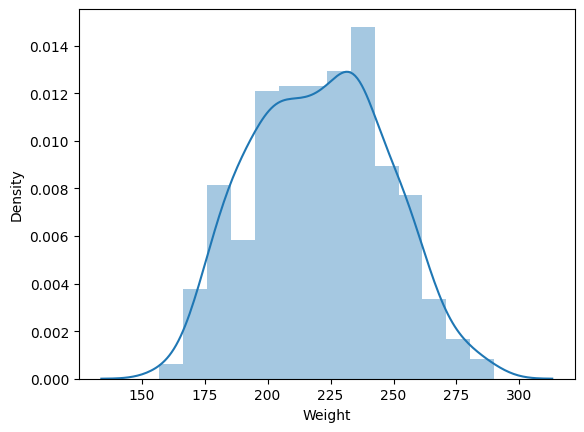

In [9]:
sns.distplot(df.Weight)
plt.show()

In [10]:
df.Weight.mean()

220.67326732673268

This is the true mean weight of the population. This is the population parameter, the ground truth.  

Let's take a random sample from this data, and see what mean we get.

In [11]:
samp_size = 30

In [12]:
df.Weight.sample(samp_size).mean()

222.1

Quite different from the population mean, right?  
Let's take another sample.

In [13]:
df.Weight.sample(samp_size).mean()

220.5

And another.

In [14]:
df.Weight.sample(samp_size).mean()

221.6

Each time we take a sample, our mean value is different. There is variability in the sample mean itself. Does the sample mean itself follow a distribution? Let's assess this.   
We'll take many samples from the data, and plot a histogram of the same.

In [15]:
sample_means = [df.Weight.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

In [16]:
len(sample_means)

1000

Plotting the density for the sample means.

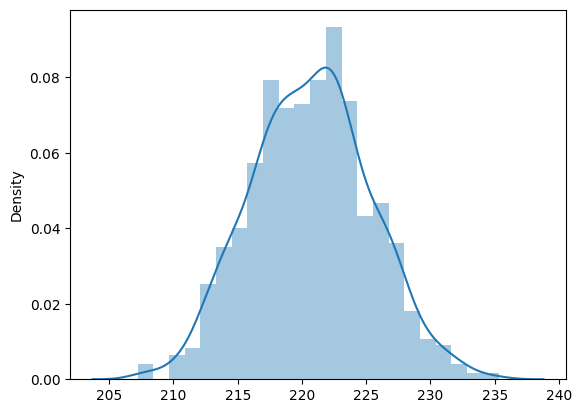

In [17]:
sns.distplot(sample_means)
plt.show()

Which distribution does this look like?

In [18]:
sample_means.mean()

220.69450000000003

In [19]:
sample_means.std()

4.641450507418217

Population std vs. std of sampling mean

In [20]:
df.Weight.std()/np.sqrt(samp_size) ##sigma/sqrt n

4.864344202231695

Let's make sure we got this right.
 - What happened here?
 - What is a sampling distribution
 - What is expected to follow a normal distribution?

#### Claim: This phenomenon occurs, rather, this theorem holds regardless of the underying populations distribution.
That seems very far fetched. We'll need to see it to believe it.

In [21]:
df1 = pd.read_csv("exp_data.csv")

In [22]:
df1.head()

VAL
0  362
1  361
2  360
3  359
4  358

In [23]:
df1.shape

(1112, 1)

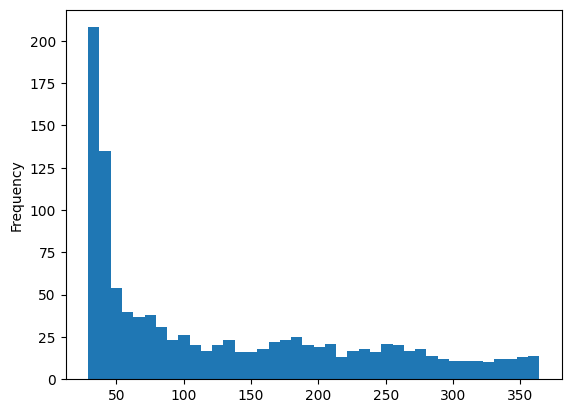

In [24]:
df1.VAL.plot.hist(bins=40)
plt.show()

Looks like an exponential distribution.

Let's pick samples from this distribution, record their means, and plot the sampling distribution.

In [25]:
samp_size = 50

In [26]:
sample_means = [df1.VAL.sample(samp_size).mean() for i in range(1000)]
sample_means = pd.Series(sample_means)

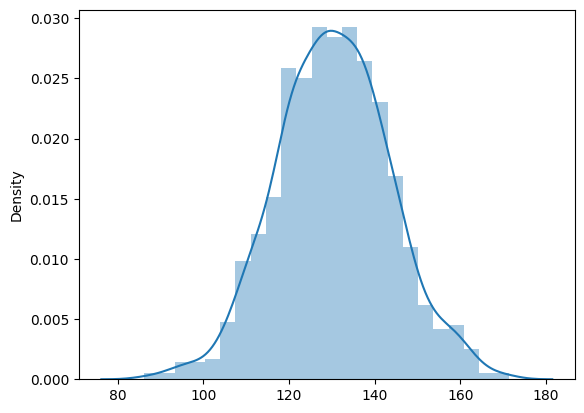

In [27]:
sns.distplot(sample_means)
plt.show()

In [28]:
sample_means.mean()

130.39214

In [29]:
df1.VAL.mean()

130.4181654676259

In [30]:
sample_means.std()

13.263962580003147

In [31]:
df1.VAL.std()/np.sqrt(samp_size)

14.06045744637763

### Effect of sample size

In [32]:
sample_sizes = [3, 10, 30, 50, 100, 200]

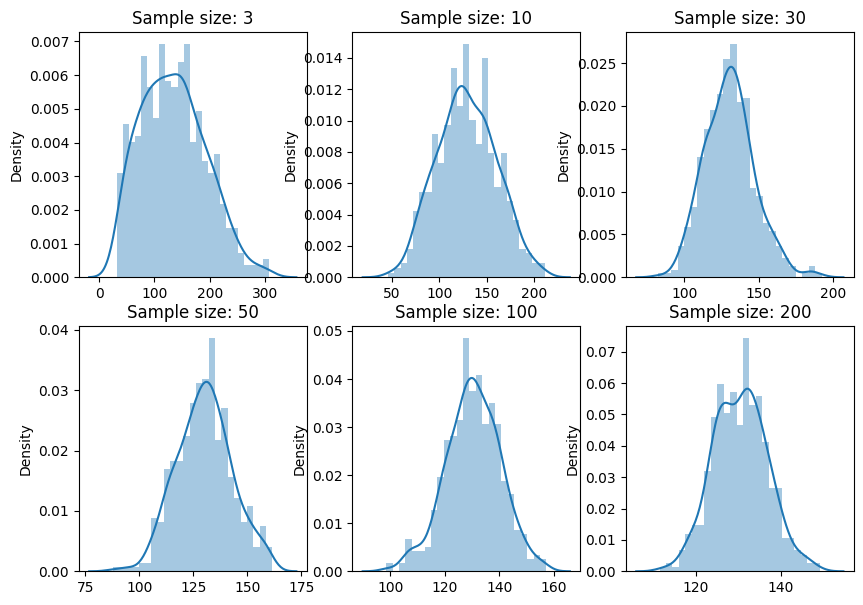

In [33]:
plt.figure(figsize=[10,7])
for ind, samp_size in enumerate(sample_sizes):
    sample_means = [df1.VAL.sample(samp_size).mean() for i in range(500)]
    plt.subplot(2,3,ind+1)
    sns.distplot(sample_means, bins=25)
    plt.title("Sample size: "+str(samp_size))
plt.show()

What is the significance of this, and why is it useful? Used in the industry?